# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Import data from the hotels dataset into a dataframe (in GitHub go to the DataSets folder and look for `hotels.csv`)
- Display the first few rows to confirm it loaded correctly.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the GitHub repository
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/hotels.csv'
df = pd.read_csv(url)

# Display the first few rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

### Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In Your Response:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧
1. The key stakeholders in this dataset are anyone who interacts with a hotel. This includes everyone from customers to executuives.

2. On one side of the spectrum, customers are conserned with booking hotel rooms, staying in a nice place, and getting the best experince posiable. On the other end, we have the execitives who are trying to uncover solutions inorder to make the hotels/resorts more profitable.

3. The data in this dataset will allow us to determine if there are any shortcoming in the current hotel managments that can be fixed inorder to generate more profit for the companies running them.




## 3. Explore Data Structure and Quality

### Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

### Do the following:
- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks


In [2]:
# Summary of the data
print("--- Data Info ---")
df.info()

print("\n--- Data Description ---")
print(df.describe())

# Find the number of Null values
print("\n--- Null Values ---")
print(df.isnull().sum())

# Find the number of duplicate row checks
print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12

### In Your Response:
1. What structural issues or problems did you find? (e.g., missing values, formatting problems)
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1. I found that there were a lot of missing values in the agent and company colums. This is bad because it will make data anaylisis much harder if we wanted to use these entries as a comparison point.

2.I recomend that the entries that contain missing agent entries be romoved, and that the company section be removed entierly.



## 4. Univariate Analysis

### Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

### Do the following:
- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

--- ADR Statistics ---
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


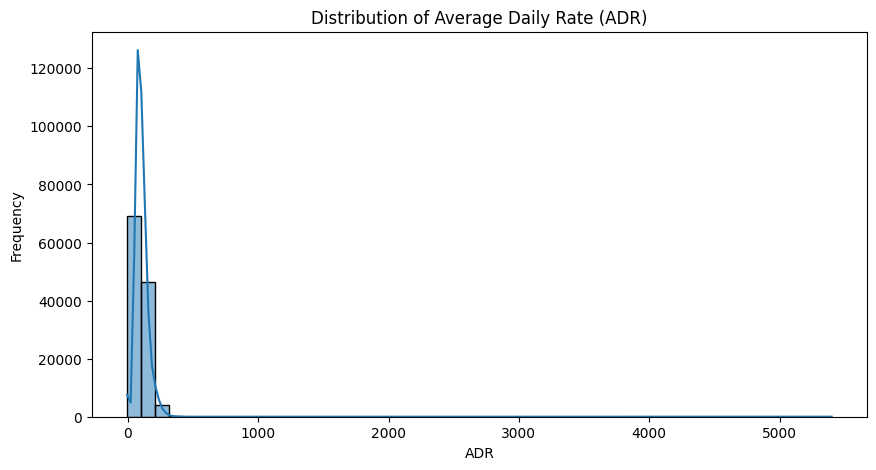


--- Cancellation Proportions ---
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


/tmp/ipython-input-2817239590.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='viridis')


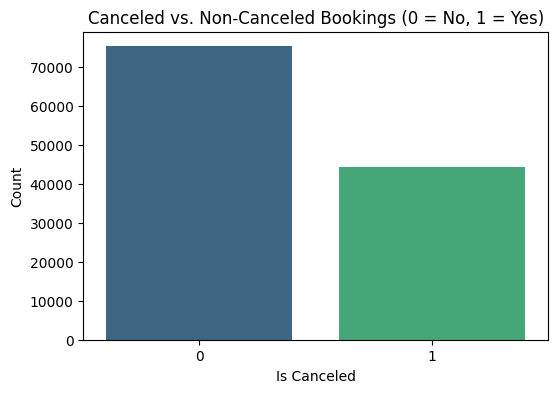


--- Customer Type Counts ---
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


/tmp/ipython-input-2817239590.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, order=df['customer_type'].value_counts().index, palette='magma')


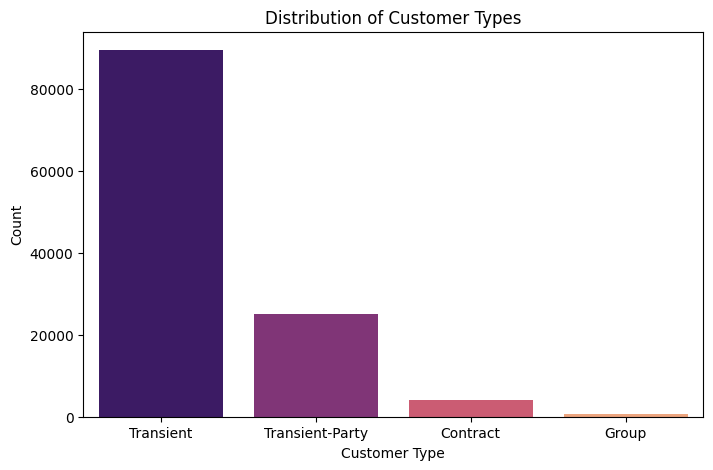

In [3]:
# 1. ADR (Average Daily Rate) - Analyzing Pricing
print("--- ADR Statistics ---")
print(df['adr'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()

# 2. is_canceled - Analyzing Booking Outcomes
print("\n--- Cancellation Proportions ---")
print(df['is_canceled'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette='viridis')
plt.title('Canceled vs. Non-Canceled Bookings (0 = No, 1 = Yes)')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.show()

# 3. customer_type - Analyzing Guest Segments
print("\n--- Customer Type Counts ---")
print(df['customer_type'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='customer_type', data=df, order=df['customer_type'].value_counts().index, palette='magma')
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

### In Your Response:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
- **Variable 1 – I looked at the average daily rent of the rooms. I found that the average daily rent of the rooms was around 101 dollars a day. I was supised to learn thism because I feel that nowdays the aveage ADR is around 230 dollars.
- **Variable 2 – I looked at the number of booking that were cancled. i found that 37% of all rooms that are booked end up being cancled at some point.   
- **Variable 3 – I looked at the distrabution of customer types. I found that most customers are transient. The second most with 25,000 entries was transient-party. The remaining groups of contract and group were very small.   


## 5. Bivariate Analysis

### Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

### Do the following:
- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

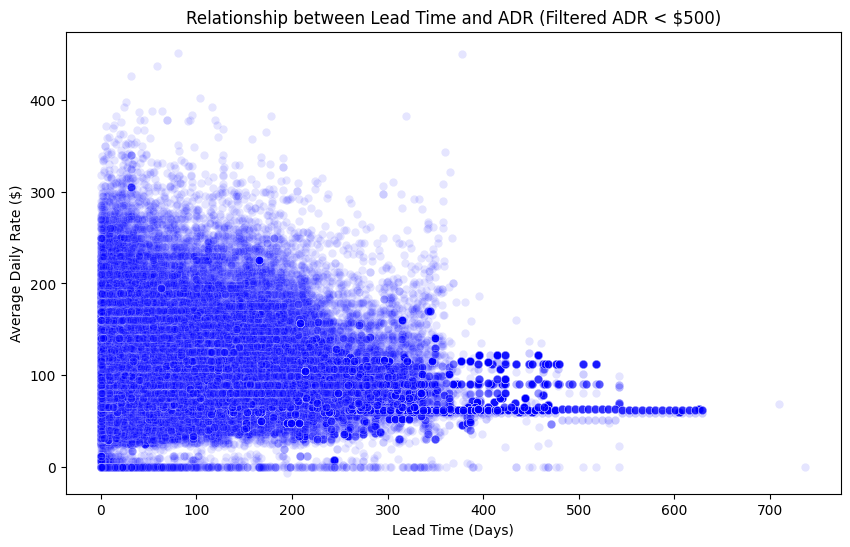

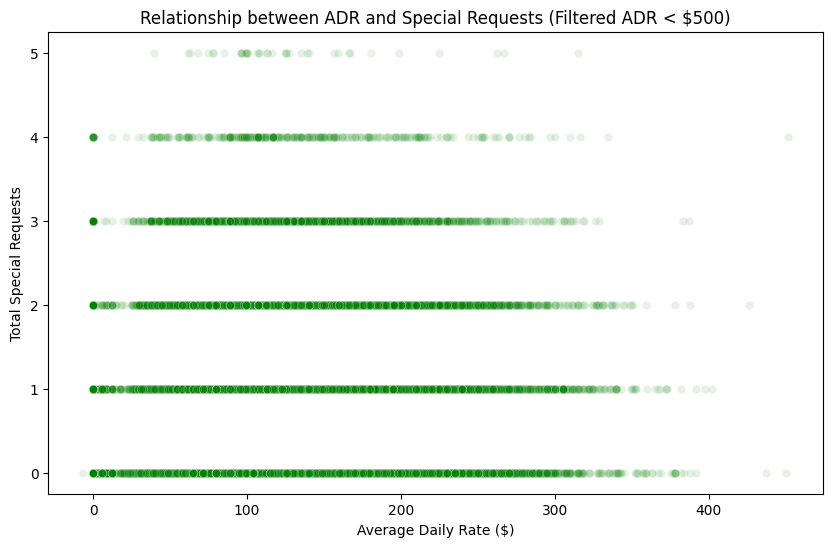

Correlation between Lead Time and ADR: -0.0631
Correlation between ADR and Special Requests: 0.1722


In [5]:
# Relationship 1: Lead Time vs. ADR
# Analyzing if booking further in advance correlates with a lower or higher price.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', data=df[df['adr'] < 500], alpha=0.1, color='blue')
plt.title('Relationship between Lead Time and ADR (Filtered ADR < $500)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate ($)')
plt.show()

# Relationship 2: ADR vs. Total Special Requests
# Analyzing if guests paying more tend to have more special requests.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='adr', y='total_of_special_requests', data=df[df['adr'] < 500], alpha=0.1, color='green')
plt.title('Relationship between ADR and Special Requests (Filtered ADR < $500)')
plt.xlabel('Average Daily Rate ($)')
plt.ylabel('Total Special Requests')
plt.show()

# Correlation check to support interpretation
correlation_1 = df[['lead_time', 'adr']].corr().iloc[0, 1]
correlation_2 = df[['adr', 'total_of_special_requests']].corr().iloc[0, 1]

print(f"Correlation between Lead Time and ADR: {correlation_1:.4f}")
print(f"Correlation between ADR and Special Requests: {correlation_2:.4f}")

### In Your Response:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- **Relationship 1:**  The first thing I analyzed was the relationship between lead time and the ADR of a booking. I found that there was not necacarily a relationship between the two variables. The ADR with the most lead time seemed to be around 80 dollars a day.
- **Relationship 2:**  The second thing I analyzed was the relationship between Total Special requests and ADR. I found that there was no correlation between the two variables. A higher ADR does not lead to more or less special requests made in a booking.


## 6. Problem Complexity and Analytics Framing

### Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In Your Response:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. Averge lead time vs the ADR of the booking.
2. This topic involves a lot of variety because the two variables do not neccicarly have a correlation; however, we can see that as the ADR aporaches 80 dollars, the lead time goes up.
3. A predictive analysis would better help explain why rooms that have an ADR around 80 dollars have the highest lead time. I suspect that there is another variable in play, but a predicitive analysis would help uncover the truth.



## 7. Final Takeaways and Recommendations

### Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In Your Response:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. After looking at the data, I was suprised to see that the average cancalation rate was 37%, and that there was very few correlated varaiables. At least out of the ones I tested.

2. The information that I was able to anaylise will help stakeholders understand what the most optiaml prices are, and how to reduce lead times. For exsample, there seems to be a certian price were lead time is the longest.

3. Based on my analysis, I recomend that the ADR of a hotel be increased to at least the mean of 110 dollars. from what I was able to learn, this will reduce lead time. Less lead time means more bookings for the hotel and more chances to fill a room if a cancalation happens.

4. This lab relates to my customized learning outcomes because I was able to anaylize a data set and create models to explain my findings. Doing this is critical for undertanding market trends such as realestate.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [8]:
!jupyter nbconvert --to html "assignment_05_eda_TettelbachIan.ipynb"

[NbConvertApp] Converting notebook assignment_05_eda_TettelbachIan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 750330 bytes to assignment_05_eda_TettelbachIan.html
